In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calmap 
import numpy as np

crime_data = pd.read_csv('../Data/crime_data_updated.csv')
#test joachim github

# Part 1) Temporal Patterns

In [ ]:
# Convert the 'Date' column to datetime format
crime_data['Date'] = pd.to_datetime(crime_data['Date'], errors='coerce')
# Create a new column 'Year' by extracting the year from the Date column
crime_data['Year'] = crime_data['Date'].dt.year

# Count crimes per year using groupby and size
crimes_per_year = crime_data.groupby('Year').size()
print(crimes_per_year)

Year
2003    142803
2004    142054
2005    137048
2006    131856
2007    131771
2008    135242
2009    134309
2010    127758
2011    126713
2012    135464
2013    147664
2014    144844
2015    151459
2016    145994
2017    149487
2018    143663
2019    138380
2020    112167
2021    121722
2022    127404
2023    125024
2024    102225
2025      7208
dtype: int64


In [3]:
# Get the year with the most crimes
year_most_crimes = crimes_per_year.idxmax()
max_crimes = crimes_per_year.max()

# Get the year with the fewest crimes
year_fewest_crimes = crimes_per_year.idxmin()
min_crimes = crimes_per_year.min()

print("Year with most recorded crimes:", year_most_crimes, "with", max_crimes, "crimes")
print("Year with fewest recorded crimes:", year_fewest_crimes, "with", min_crimes, "crimes")

Year with most recorded crimes: 2015 with 151459 crimes
Year with fewest recorded crimes: 2025 with 7208 crimes


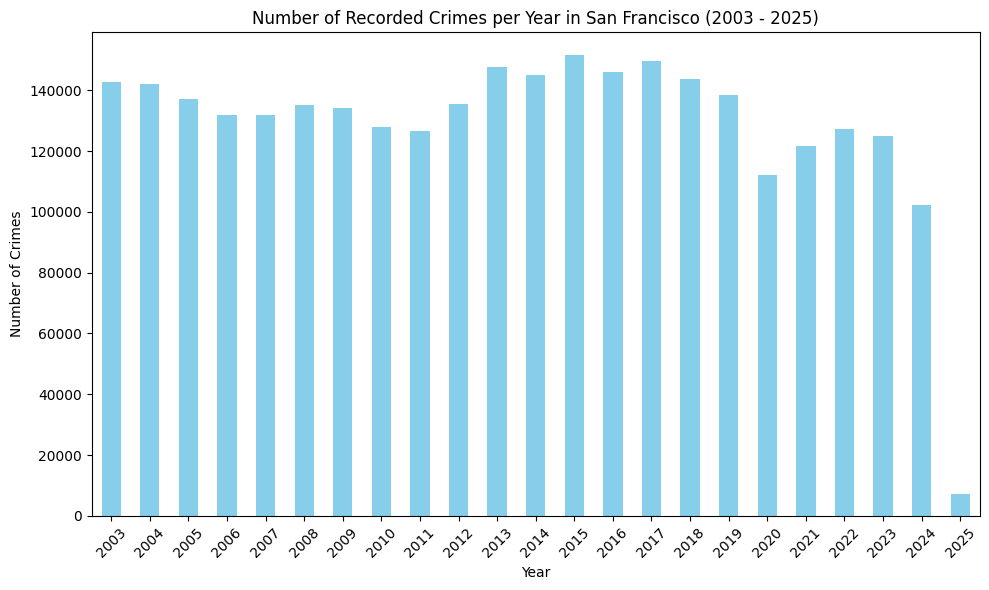

In [4]:
# Sort the crimes per year from lowest to highest
crimes_per_year_sorted = crimes_per_year.sort_index()

# Plot bar plot of crimes per year
plt.figure(figsize=(10, 6))
crimes_per_year_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Recorded Crimes per Year in San Francisco (2003 - 2025)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

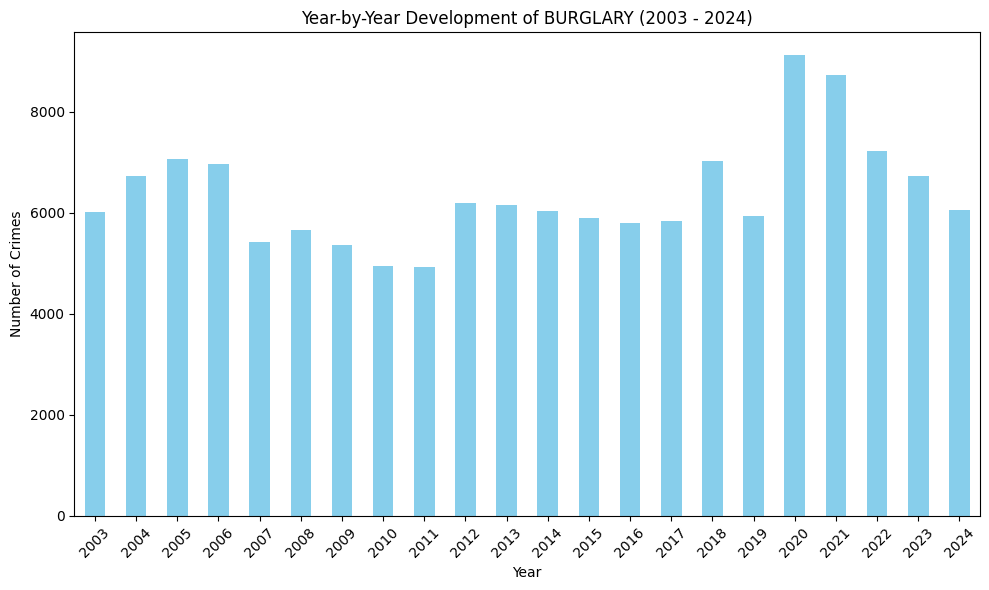

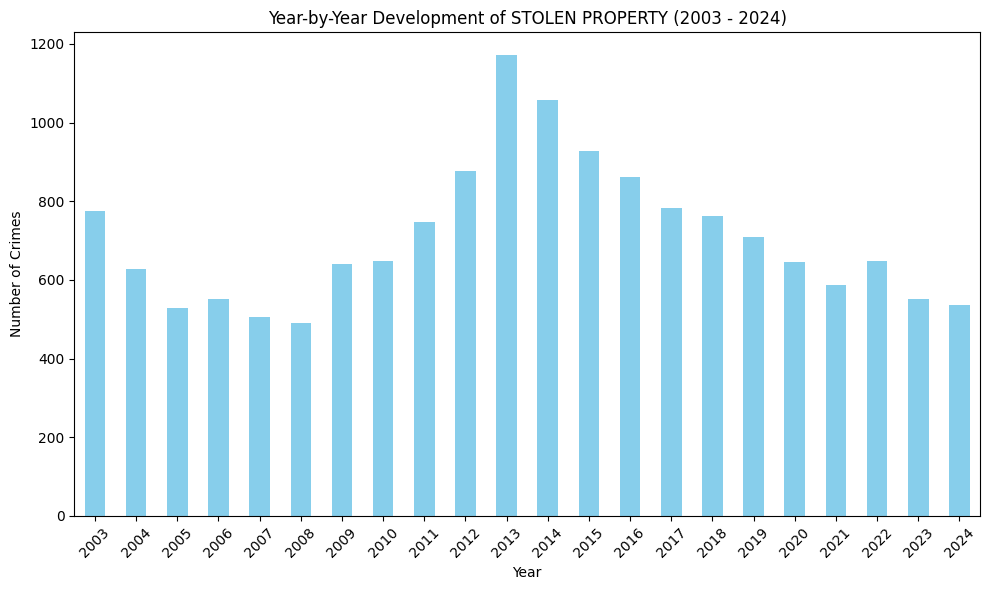

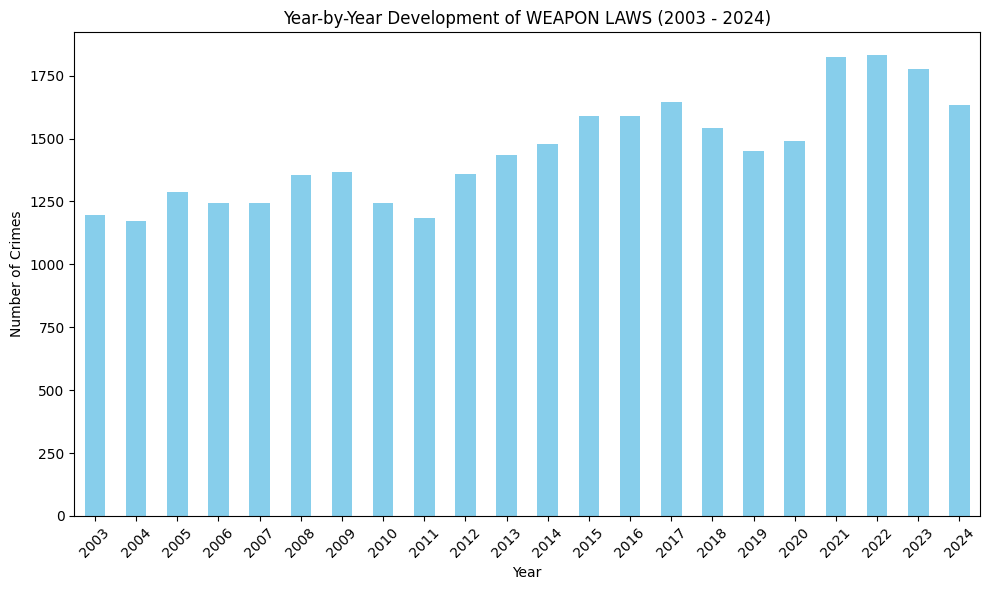

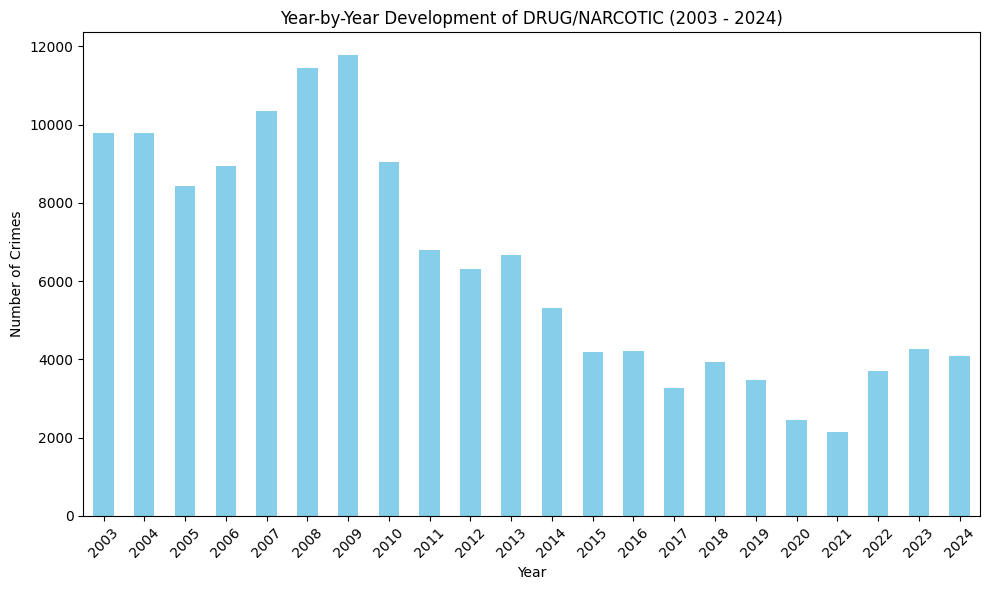

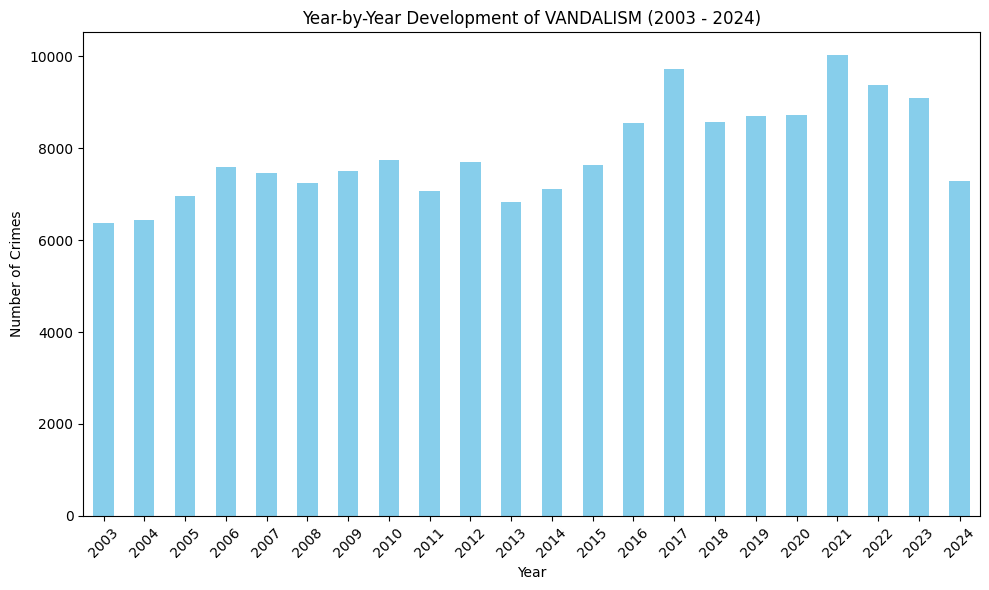

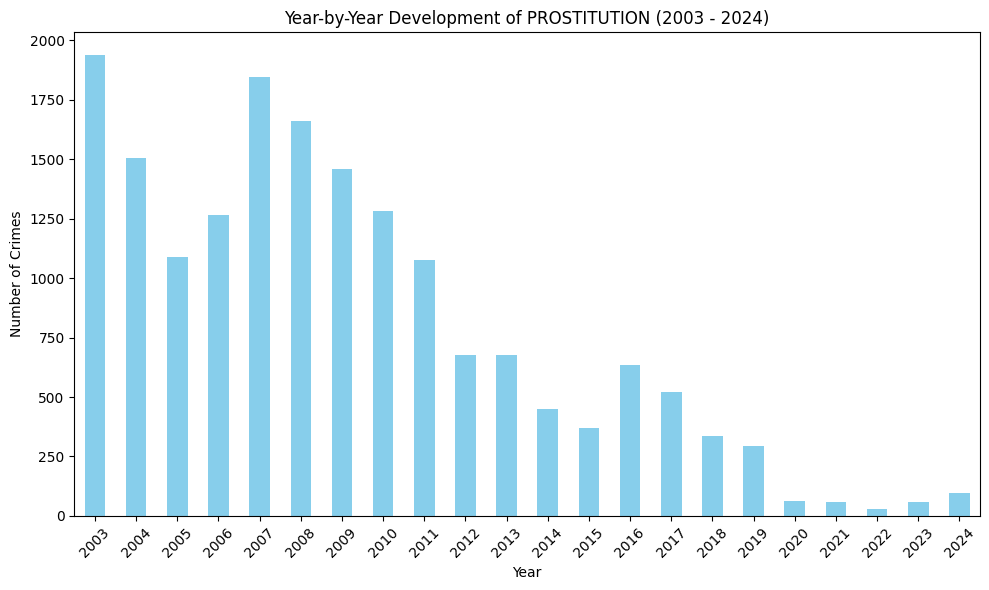

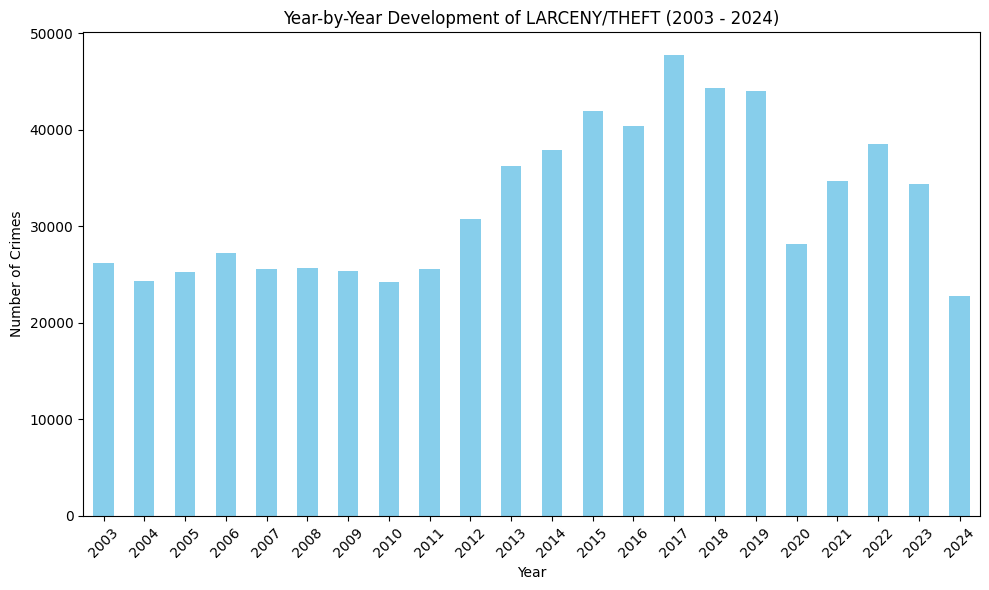

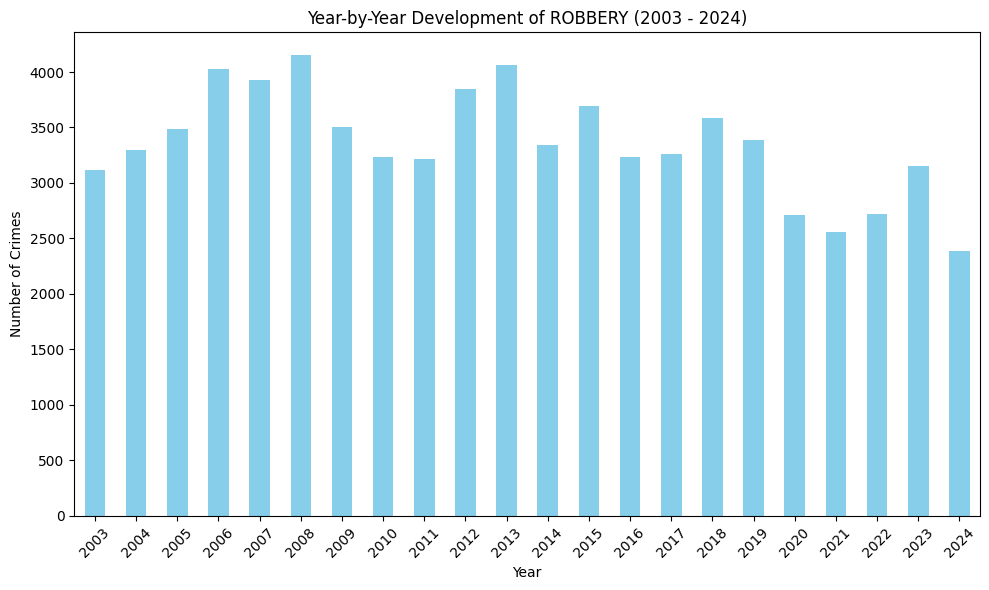

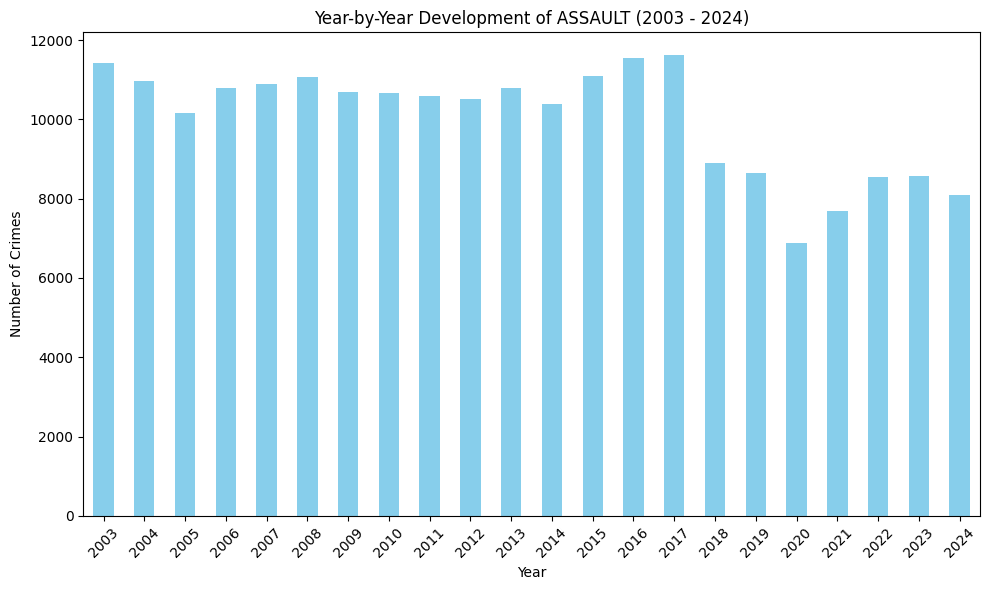

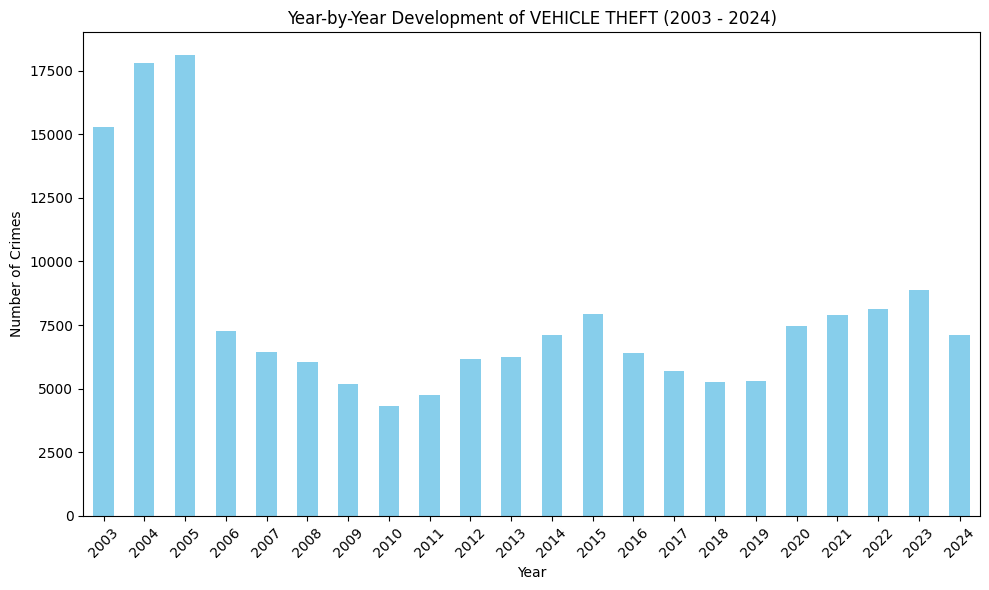

In [5]:
# Now to plot the focus crimes bar plots

# Define the focus crime categories
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

# Since 2025 isn't over yet, we exclude it from the data
crime_data = crime_data[(crime_data['Year'] >= 2003) & (crime_data['Year'] <= 2024)]

# Loop over each focus crime category
for crime in focuscrimes:
    # Filter for the current crime category
    crime_subset = crime_data[crime_data['Category'] == crime]
    
    # Count the number of crimes per year
    crimes_per_year = crime_subset['Year'].value_counts().sort_index()
    
    # To ensure that every year is represented even though the count is 0, we add missing years with 0 crimes just in case
    all_years = pd.Series(0, index=range(2003, 2025))
    crimes_per_year = all_years.add(crimes_per_year, fill_value=0).astype(int)
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    crimes_per_year.plot(kind='bar', color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.title(f'Year-by-Year Development of {crime} (2003 - 2024)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Part 1) Continued: 

## Comment on at least three interesting trends in your plot.

1. One interesting trend is that prostitution has declined heavily since 2007, which coincided with the subprime mortgage crisis of 2007. One explanation could be that due to the economic circumstances, sex services became less affordable and thus it declined. In the 2010s it continued to decline, despite the latter half of the 2010s marking an economic recovery [1].

2. Also noticed, when cleaning the dataset, the new dataset had vandalism, but the numbers were significantly smaller than the old dataset from 2003 to 2018. When I combined malicious mischief, which hints at vandalism, the numbers matched the previous dataset more, so a reclassification of vandalism was interesting.

3. Another issue of narcotics has also gone significantly down in the 2010s, which is partly attributed to Proposition 47, which was designed to ease up on the prison population and thus reclassified various crimes from felonies to misdemeanors, including possession of most illegal narcotics for consumption [3].

### References:
[1] Doe, J. (2010). *Economic Effects of the 2007 Financial Crisis*. Journal of Economics.  
[2] California Legislative Information. *Proposition 47 Overview*. Available at: [https://www.courts.ca.gov/prop47.htm](https://www.courts.ca.gov/prop47.htm)


# Part 2) Questions from Week 2

# Part 3) Other Cool Ways to Plot Temporal Data

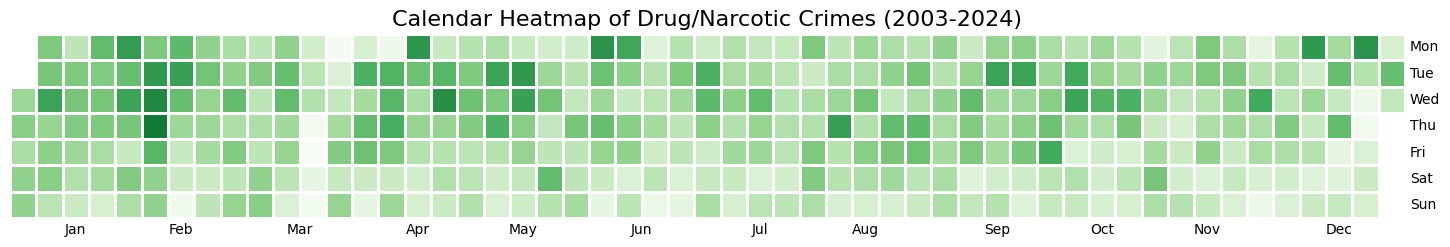

In [6]:
# Let's create a calendar heatmap of the number of crimes based on drugs and narcotics

# Filter for years 2003-2023 and "DRUG/NARCOTIC" category
filtered_data = crime_data[
    (crime_data['Date'].dt.year >= 2003) & 
    (crime_data['Date'].dt.year <= 2024) & 
    (crime_data['Category'] == "DRUG/NARCOTIC")
]

# Aggregate crimes per day
crime_counts_per_day = filtered_data.groupby(filtered_data['Date'].dt.date).size()

# Convert index to datetime for calmap compatibility
crime_counts_per_day.index = pd.to_datetime(crime_counts_per_day.index)

# Plot calendar heatmap
plt.figure(figsize=(18, 10))
calmap.yearplot(crime_counts_per_day, cmap='Greens', fillcolor='white')

# Add title
plt.title("Calendar Heatmap of Drug/Narcotic Crimes (2003-2024)", fontsize=16)

plt.show()

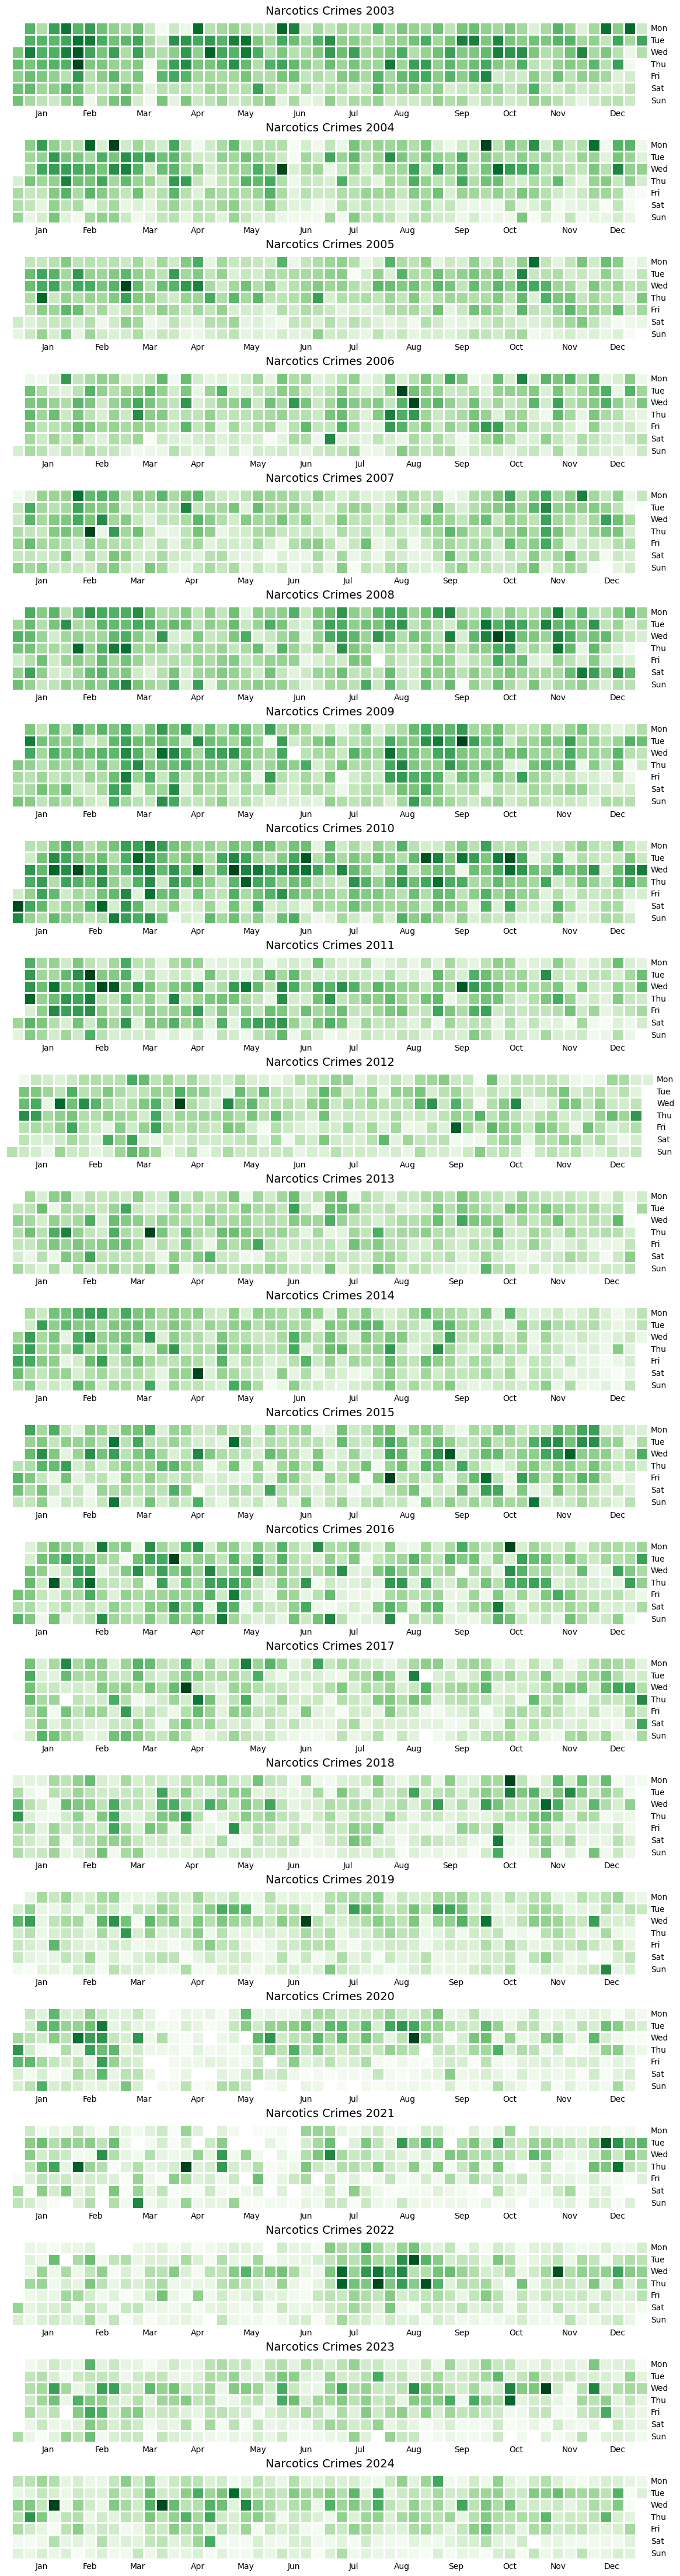

In [7]:
# Set up subplots: 1 column, multiple rows (one per year)
num_years = len(range(2003, 2025))  # We had to go all the way to 2018 because the data cuts off after there due to a data cleaning issue
fig, axes = plt.subplots(nrows=num_years, ncols=1, figsize=(18, num_years * 2), constrained_layout=True)

# Loop through each year and plot a separate calendar heatmap in each row
for i, year in enumerate(range(2003, 2025)):
    ax = axes[i]  # Select current subplot

    # Filter crimes for the current year
    yearly_data = crime_counts_per_day[crime_counts_per_day.index.year == year]

    # Create a yearly calendar heatmap
    calmap.yearplot(yearly_data, year=year, cmap='Greens', fillcolor='white', ax=ax)

    # Add title for each year
    ax.set_title('Narcotics Crimes ' + str(year), fontsize=14, pad=10)

# Show the plot
plt.show()

With calendar plots, it is difficult to visualize the absolute size of crime occurences, but if we are interested in seeing the concentration of crimes in a given date, calender plots are nice to visualize with. In this specific scenario, we can see that the early 2000s have relatively dark boxes, which gradually tapered down into the later 2000s, which then shot up again in 2008, possibly as a side effect of the financial crisis as mentioned in part 1. One interesting note is that the number of narcotics crimes seem to be tapering off the last 5 years, despite the opoid crisis wreaking havoc onto America's narcotics issue. 

In [ ]:
# Polar Bar chart

# Let's go back to prostitution and plot a polar bar chart of prostitution cases based on hour of the day
prostitution_data = crime_data[crime_data['Category'] == 'PROSTITUTION']

# Convert the 'Time' column to datetime format
prostitution_data['Time'] = pd.to_datetime(prostitution_data['Time'])

# Extract the hour from the Time column
prostitution_hourly = prostitution_data['Time'].dt.hour

# Count the number of prostitution cases per hour
prostitution_hourly_counts = prostitution_hourly.value_counts().sort_index()

# Let's see the counts
print(prostitution_hourly_counts)

Time
0     1466
1     1114
2      833
3      583
4      485
5      579
6      531
7      277
8      155
9      159
10     194
11     219
12     527
13     345
14     324
15     268
16     316
17     630
18    1184
19    1375
20    1099
21    1330
22    1678
23    1710
Name: count, dtype: int64


C:\Users\gisle\AppData\Local\Temp\ipykernel_6912\272714084.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prostitution_data['Time'] = pd.to_datetime(prostitution_data['Time'])
C:\Users\gisle\AppData\Local\Temp\ipykernel_6912\272714084.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prostitution_data['Time'] = pd.to_datetime(prostitution_data['Time'])


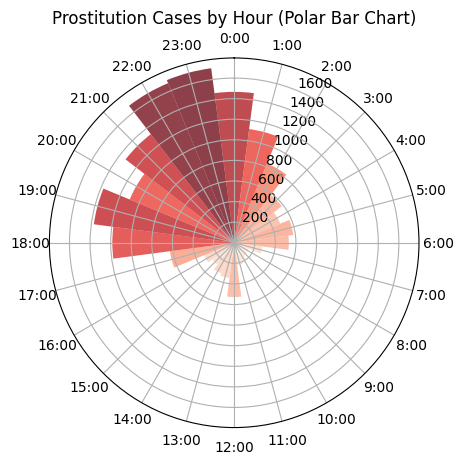

In [27]:
# Number of slices
num_slices = 24

# Convert hours (0-23) into angles for the polar plot from 0 to 2pi
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)
radii = prostitution_hourly_counts.values
# Define bar width
width = 2 * np.pi / 24  # Uniform width for each hour

ax = plt.subplot(projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0, color=plt.cm.Reds(radii / radii.max()), alpha=0.75)

# Set 0° at the top so that it starts at midnight at the top
ax.set_theta_zero_location("N")
# Clockwise direction
ax.set_theta_direction(-1)

# Set labels for hours
ax.set_xticks(theta)
ax.set_xticklabels([f"{h}:00" for h in range(24)])

plt.title("Prostitution Cases by Hour (Polar Bar Chart)")
plt.show()

This polar chart shows the various magnitudes of prostitution cases by the hour and the higher the count, the higher the slice in the polar chart chart. We can see here that during the day, from 06:00 to 16:00, we see a relatively insignificant amount of prostitution cases, but they suddenly concentrate between 17:00 - 02:00 tapering off towards 05:00. This makes sense on the consumer side given that purchasers of sex usually have jobs to afford them. One interesting phenomena to explore would be observing if prostitutes have day jobs, and if so, what occupation they have, number of hours worked per week and how often they work as prostitutes.

Reflection:

What I learned is that going nuts with relatively simple scripts are achieveable with LLMs given context, but if I need to tweak some variables, it is unclear what I need to change due to the fact that this code was generated for me. 

# Part 4) N/A

# Part 5) N/A

# Contributions

Part 1: Gisle
Part 2
Part 3: Gisle
Part 4
Part 5